In [1]:
from Supporting_functions import *

import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time
import skimage 

# Predictions for different models


In [9]:
# Define paths

modelName = 'nuclei2nuclei'

# Models
srcpath = r'/home/hmorales/WorkSpace/DataIsoReconstructions/'+modelName+'/'
path_models = srcpath+'checkpoint/saved_models/deblur/'

# Image to test
img_src_path = '/home/hmorales/WorkSpace/DataIsoReconstructions/test_data/'
img_test_path = os.path.join(img_src_path, 'memRFPhisGFP_20230821_T010_A001_nuclei_raw.tif')
img_gt_path = os.path.join(img_src_path, 'Nuclei_RL20.tif')
scale=0.23160005

#output dri
outdir = img_src_path+'/res_'+modelName+'/'
outsufix = 'Self_Net_output_'+modelName

# CUDA device
device1 = torch.device('cuda:0')
device2 = torch.device('cuda:0')

# Image Normalization
min_v = 0
max_v = 65535
norm_percentiles = (20.0, 99.9995)  #99.9995 For Nuclei


# Create output folder
if not os.path.exists(outdir):
    os.mkdir(outdir)

Intensity from (0 , 65535) to  (0, 65535) 
Intensity from (0 , 65535) to  (0, 65535) 
(300, 134, 300)
(300, 134, 300)


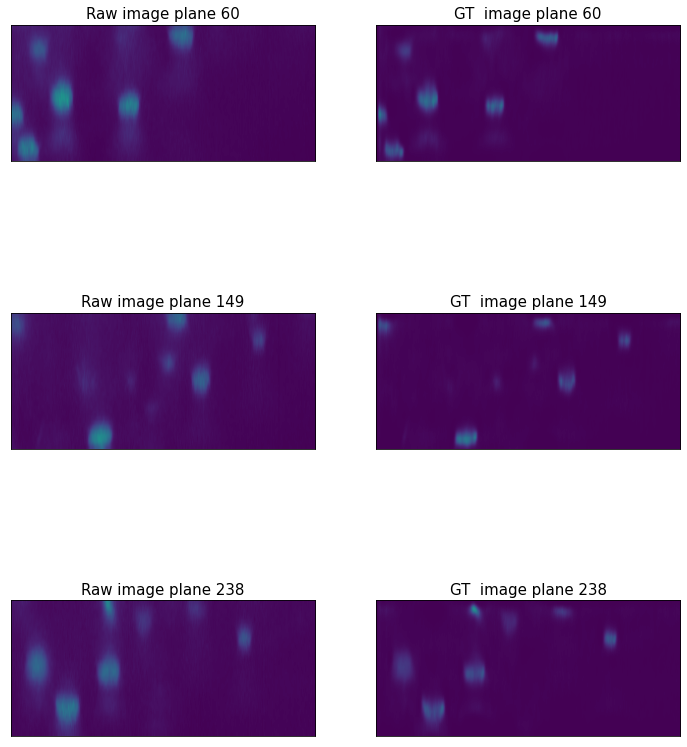

In [3]:
# Load images
raw_img  =  tifffile.imread(img_test_path).astype(np.float32)
gt_img   =  tifffile.imread(img_gt_path).astype(np.float32)

raw_img = image_preprocessing(raw_img, norm_percentiles, min_v, max_v)
gt_img  = image_preprocessing(gt_img, norm_percentiles, min_v, max_v)


raw_img = raw_img[:,200:500,0:300]
gt_img  = gt_img[:,200:500,0:300]

# plot some axial planes

raw_img_xz  =reslice(raw_img,'xz',scale,1)
gt_img_xz  = np.transpose(gt_img,[1,0,2])
raw_img_intep = np.transpose(raw_img_xz,[1,0,2])


print(raw_img_xz.shape)
print(gt_img_xz.shape)

    
def show(ax, image, title):
    ax.imshow(image, cmap='viridis', vmin=0, vmax=65535)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(title,fontsize=15)
    
fig = plt.figure(figsize=(12,15))
axs = fig.subplots(3,2)
dplane = int(0.2*raw_img_xz.shape[0])

for i, idx in enumerate(range(dplane,raw_img_xz.shape[0], int(0.5*(raw_img_xz.shape[0]-2*dplane))-1)):   
    subtitle0 = f"Raw image plane {idx}" 
    subtitle1 = f"GT  image plane {idx}" 
    show(axs[i,0], raw_img_xz[idx,:,:], subtitle0)
    show(axs[i,1], gt_img_xz[idx,:,:], subtitle1)    


In [4]:
# Prepare networks
deblur_net_A = Self_net_architecture.define_G(input_nc=1, output_nc=1, ngf=64, netG='deblur_net', device=device1,use_dropout=False,norm='instance')
deblur_net_B = Self_net_architecture.define_G(input_nc=1, output_nc=1, ngf=64, netG='deblur_net', device=device1,use_dropout=False,norm='instance')


# Get all models ('pkl' files) in the folder
model_names = [f for f in os.listdir(path_models) if f.endswith('.pkl')]
model_names.sort(key=custom_sort)

# Calculate for each model
for i, model_name in enumerate(model_names):

    start_time = time.time()  # Record the start time    
    img = raw_img
    model_path = os.path.join(path_models,model_name);
    # Load Model
    deblur_net_A.load_state_dict(torch.load(model_path))
    deblur_net_B.load_state_dict(torch.load(model_path))
    # Predict image
    fusion_stack=upsample_block(img,scale,1,deblur_net_A,deblur_net_B,min_v,max_v, device1, device2)
    
    #newimg_min = np.amin(fusion_stack)
    #newimg_max = np.amax(fusion_stack)	
    #print('fusion_stack  (%d, %d) ' % (newimg_min, newimg_max), '\n')
    
    # Save result
    outName = outdir+'Self_Net_output'+model_name+'.tif';
    tifffile.imwrite(outName,fusion_stack)
    
    elapsed_time = time.time() - start_time
    print(f"Elapsed Time: {elapsed_time:.4f} seconds, model{model_name}")


initialize network with normal
initialize network with normal
Elapsed Time: 4.7524 seconds, modeldeblur_net_1_1200.pkl
Elapsed Time: 4.1925 seconds, modeldeblur_net_1_2400.pkl
Elapsed Time: 5.7786 seconds, modeldeblur_net_1_3600.pkl
Elapsed Time: 5.8260 seconds, modeldeblur_net_1_4800.pkl
Elapsed Time: 5.7684 seconds, modeldeblur_net_1_6000.pkl
Elapsed Time: 5.8127 seconds, modeldeblur_net_1_7200.pkl
Elapsed Time: 5.7993 seconds, modeldeblur_net_2_1200.pkl
Elapsed Time: 5.8230 seconds, modeldeblur_net_2_2400.pkl
Elapsed Time: 5.8241 seconds, modeldeblur_net_2_3600.pkl
Elapsed Time: 5.8064 seconds, modeldeblur_net_2_4800.pkl
Elapsed Time: 5.8112 seconds, modeldeblur_net_2_6000.pkl
Elapsed Time: 5.8579 seconds, modeldeblur_net_2_7200.pkl
Elapsed Time: 5.8573 seconds, modeldeblur_net_3_1200.pkl
Elapsed Time: 5.8271 seconds, modeldeblur_net_3_2400.pkl
Elapsed Time: 5.8687 seconds, modeldeblur_net_3_3600.pkl
Elapsed Time: 5.9508 seconds, modeldeblur_net_3_4800.pkl
Elapsed Time: 5.8234 secon

Elapsed Time: 5.8187 seconds, modeldeblur_net_24_6000.pkl
Elapsed Time: 5.8582 seconds, modeldeblur_net_24_7200.pkl
Elapsed Time: 5.8216 seconds, modeldeblur_net_25_1200.pkl
Elapsed Time: 5.8175 seconds, modeldeblur_net_25_2400.pkl
Elapsed Time: 5.8151 seconds, modeldeblur_net_25_3600.pkl
Elapsed Time: 5.8074 seconds, modeldeblur_net_25_4800.pkl
Elapsed Time: 5.8485 seconds, modeldeblur_net_25_6000.pkl
Elapsed Time: 5.8114 seconds, modeldeblur_net_25_7200.pkl
Elapsed Time: 5.8465 seconds, modeldeblur_net_26_1200.pkl
Elapsed Time: 5.8435 seconds, modeldeblur_net_26_2400.pkl
Elapsed Time: 5.8330 seconds, modeldeblur_net_26_3600.pkl
Elapsed Time: 5.8218 seconds, modeldeblur_net_26_4800.pkl
Elapsed Time: 5.8055 seconds, modeldeblur_net_26_6000.pkl
Elapsed Time: 5.8428 seconds, modeldeblur_net_26_7200.pkl
Elapsed Time: 5.8437 seconds, modeldeblur_net_27_1200.pkl
Elapsed Time: 5.8369 seconds, modeldeblur_net_27_2400.pkl
Elapsed Time: 5.8585 seconds, modeldeblur_net_27_3600.pkl
Elapsed Time: 

Elapsed Time: 5.8561 seconds, modeldeblur_net_48_3600.pkl
Elapsed Time: 5.8452 seconds, modeldeblur_net_48_4800.pkl
Elapsed Time: 5.8389 seconds, modeldeblur_net_48_6000.pkl
Elapsed Time: 5.8483 seconds, modeldeblur_net_48_7200.pkl
Elapsed Time: 5.9158 seconds, modeldeblur_net_49_1200.pkl
Elapsed Time: 5.9135 seconds, modeldeblur_net_49_2400.pkl
Elapsed Time: 5.9643 seconds, modeldeblur_net_49_3600.pkl
Elapsed Time: 5.9574 seconds, modeldeblur_net_49_4800.pkl
Elapsed Time: 5.9336 seconds, modeldeblur_net_49_6000.pkl
Elapsed Time: 6.1298 seconds, modeldeblur_net_49_7200.pkl
Elapsed Time: 5.9870 seconds, modeldeblur_net_50_1200.pkl
Elapsed Time: 5.8776 seconds, modeldeblur_net_50_2400.pkl
Elapsed Time: 5.8452 seconds, modeldeblur_net_50_3600.pkl
Elapsed Time: 5.9516 seconds, modeldeblur_net_50_4800.pkl
Elapsed Time: 5.9157 seconds, modeldeblur_net_50_6000.pkl
Elapsed Time: 5.8841 seconds, modeldeblur_net_50_7200.pkl
Elapsed Time: 5.8358 seconds, modeldeblur_net_51_1200.pkl
Elapsed Time: 

Elapsed Time: 5.9556 seconds, modeldeblur_net_72_1200.pkl
Elapsed Time: 6.0294 seconds, modeldeblur_net_72_2400.pkl
Elapsed Time: 6.0062 seconds, modeldeblur_net_72_3600.pkl
Elapsed Time: 5.9892 seconds, modeldeblur_net_72_4800.pkl
Elapsed Time: 5.9297 seconds, modeldeblur_net_72_6000.pkl
Elapsed Time: 6.0071 seconds, modeldeblur_net_72_7200.pkl
Elapsed Time: 5.9084 seconds, modeldeblur_net_73_1200.pkl
Elapsed Time: 5.8687 seconds, modeldeblur_net_73_2400.pkl
Elapsed Time: 5.8845 seconds, modeldeblur_net_73_3600.pkl
Elapsed Time: 5.8884 seconds, modeldeblur_net_73_4800.pkl
Elapsed Time: 5.8893 seconds, modeldeblur_net_73_6000.pkl
Elapsed Time: 5.8884 seconds, modeldeblur_net_73_7200.pkl
Elapsed Time: 5.9811 seconds, modeldeblur_net_74_1200.pkl
Elapsed Time: 5.9004 seconds, modeldeblur_net_74_2400.pkl
Elapsed Time: 5.8587 seconds, modeldeblur_net_74_3600.pkl
Elapsed Time: 5.9684 seconds, modeldeblur_net_74_4800.pkl
Elapsed Time: 5.9331 seconds, modeldeblur_net_74_6000.pkl
Elapsed Time: 

RuntimeError: Error(s) in loading state_dict for Deblur_Net:
	Missing key(s) in state_dict: "model.1.weight", "model.1.bias", "model.3.weight", "model.3.bias", "model.7.conv_block.1.weight", "model.7.conv_block.1.bias", "model.7.conv_block.4.weight", "model.7.conv_block.4.bias", "model.8.conv_block.1.weight", "model.8.conv_block.1.bias", "model.8.conv_block.4.weight", "model.8.conv_block.4.bias", "model.9.conv_block.1.weight", "model.9.conv_block.1.bias", "model.9.conv_block.4.weight", "model.9.conv_block.4.bias", "model.10.conv_block.1.weight", "model.10.conv_block.1.bias", "model.10.conv_block.4.weight", "model.10.conv_block.4.bias", "model.11.conv_block.1.weight", "model.11.conv_block.1.bias", "model.11.conv_block.4.weight", "model.11.conv_block.4.bias", "model.12.conv_block.1.weight", "model.12.conv_block.1.bias", "model.12.conv_block.4.weight", "model.12.conv_block.4.bias", "model.13.weight", "model.13.bias", "model.15.weight", "model.15.bias", "model.18.weight", "model.18.bias". 
	Unexpected key(s) in state_dict: "model.0.weight", "model.0.bias", "model.2.weight", "model.2.bias", "model.8.weight", "model.8.bias". 
	size mismatch for model.5.weight: copying a param with shape torch.Size([256, 128, 4, 4]) from checkpoint, the shape in current model is torch.Size([64, 64, 3, 3]).
	size mismatch for model.5.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([64]).

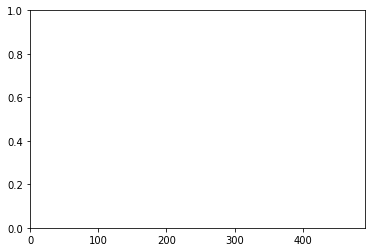

In [ ]:
from skimage import io
from skimage.metrics import structural_similarity as ssim


# get stats of predictions and GT

Nmodels= len(model_names)
model_idx = np.linspace(1,Nmodels,Nmodels)


# crop image GT and reference

ref_img = raw_img_intep[35:100,:,:]
gt_scaled_img  = gt_img[35:100,:,:]



# SSIM

y = np.empty_like(model_idx)
y[:] = np.nan


fig, ax = plt.subplots()
line, = ax.plot(model_idx, y) 
ax.set_xlim(0, Nmodels+1)
ax.set_ylim(0.0, 1.0)


# Calculate for each model
for idx, model_name in enumerate(model_names):
    # open result
    outName = outdir+'Self_Net_output'+model_name+'.tif';
    res_img  =  tifffile.imread(outName).astype(np.float32)   
    res_img = res_img[35:100,:,:]
   
    # Get anisotopy
    ssim_value = ssim(gt_scaled_img, res_img, gaussian_weights=True) 
    
    #eigen_pred = skimage.measure.inertia_tensor_eigvals(res_img)
    #a_pred = eigen_pred[2]/eigen_pred[0]

  
    y[idx] = ssim_value
    #yGT[idx] = a_GT
    
    # Update the plot
    line.set_ydata(y)
    #lineGT.set_ydata(yGT)
    clear_output(wait=True)  # Clear the previous plot
    display(fig)
    
    # Close the figure when the loop is done
    plt.close(fig)
    #print(a_pred)
    

In [52]:
from scipy.optimize import minimize

def error_images(imageA, imageB):
    #err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    #err /= float(imageA.shape[0] * imageA.shape[1] * imageA.shape[2])
    err = ssim(gt_scaled_img, res_img, multichannel=False) 
    return err

# Define a function to calculate the MSE between two images
def mse_images(scaling_factor, image1, image2):
    scaled_image2 = scaling_factor * image2
    mse_value = error_images(image1, scaled_image2)
    return mse_value


# crop image GT and reference

ref_img = raw_img_intep[35:100,:,:]
gt_scaled_img  = gt_img[35:100,:,:]
result = minimize(mse_images, x0=1.0, args=(ref_img, gt_scaled_img), bounds=[(0.1, 10.0)])
scaling_factor = result.x[0]
gt_scaled_img = gt_scaled_img * scaling_factor  

print(scaling_factor)
print(ref_img.shape)

/tmp/ipykernel_3851861/3716003194.py:6: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  err = ssim(gt_scaled_img, res_img, multichannel=False)


1.0
(65, 300, 300)


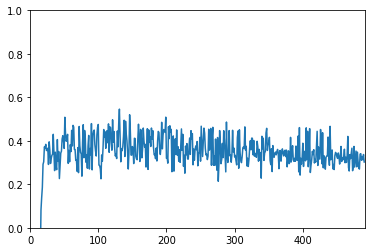

0.3025678573340895


In [53]:
y = np.empty_like(model_idx)
y[:] = np.nan

fig, ax = plt.subplots()
line, = ax.plot(model_idx, y) 
ax.set_xlim(0, Nmodels+1)
ax.set_ylim(0, 1)

# Calculate for each model
for idx, model_name in enumerate(model_names):
    # open result
    outName = outdir+'Self_Net_output'+model_name+'.tif';
    
    
    res_img  =  tifffile.imread(outName).astype(np.float32)   
    res_img = res_img[35:100,:,:]

    
    # Scaling of intensities
    result = minimize(mse_images, x0=1.0, args=(ref_img, res_img), bounds=[(0.1, 10.0)])
    scaling_factor = result.x[0]

    # Apply the scaling factor to the second image
    res_img = res_img * scaling_factor  
    
    # get MSE to the GT
    mse_value = error_images(gt_scaled_img, res_img) #/ 1000000
    
    # plot scaling factors
    y[idx] = mse_value
    
    # Update the plot
    line.set_ydata(y)
    clear_output(wait=True)  # Clear the previous plot
    display(fig)
    
    # Close the figure when the loop is done
    plt.close(fig)
    print(mse_value)
    

In [14]:
# Get min error

max_value = np.min(y)
max_index = np.argmin(y)

print("Maximum Value:", max_value)
print("Index of Maximum Value:", max_index)
print("Model Maximum Value:", model_names[max_index])

outName = img_src_path+outsufix+'_gt.tif';
tifffile.imwrite(outName,gt_scaled_img)
outName = img_src_path+outsufix+'_raw.tif';
tifffile.imwrite(outName,ref_img)

outName = outdir+'Self_Net_output'+model_names[max_index]+'.tif';   
res_img  =  tifffile.imread(outName).astype(np.float32)   
res_img = res_img[35:100,:,:]
result = minimize(mse_images, x0=1.0, args=(ref_img, res_img), bounds=[(0.1, 10.0)])
scaling_factor = result.x[0]
res_img = res_img * scaling_factor  
outName = img_src_path+outsufix+'_pred'+model_names[max_index]+'.tif';
tifffile.imwrite(outName,res_img)


Maximum Value: 1.9378728677264305
Index of Maximum Value: 29
Model Maximum Value: deblur_net_5_7200.pkl


In [22]:
import skimage 

# Load your grayscale image (replace 'your_image.png' with your image file)
image = ref_img

eigen = skimage.measure.inertia_tensor_eigvals(image)
print(eigen[2]/eigen[0])

eigen = skimage.measure.inertia_tensor_eigvals(gt_scaled_img)
print(eigen[2]/eigen[0])

eigen = skimage.measure.inertia_tensor_eigvals(res_img)
print(eigen[2]/eigen[0])

0.4649263660381277
0.4618565
0.4354171


(65, 300, 300)
(134, 300, 300)


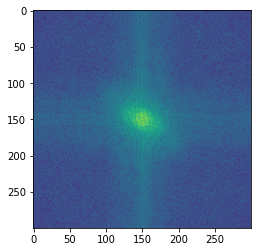

In [48]:
import numpy as np
from scipy.fft import fftn, fftshift
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


print(ref_img.shape)
fft_result = fftn(res_img)
fft_result = fftshift(fft_result)

# Plotting the magnitude of the FFT result
magnitude_spectrum = np.abs(fft_result)
magnitude_spectrum = np.log(magnitude_spectrum)**2

print(magnitude_spectrum.shape)

plt.imshow(magnitude_spectrum[1,:,:])

tifffile.imwrite("fft.tif",magnitude_spectrum)

plt.show()

(200, 200)


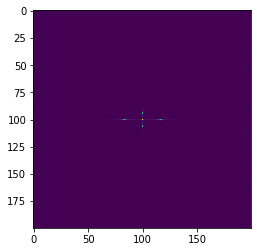

In [43]:
import matplotlib.pyplot as plt
import scipy
rng = np.random.default_rng()
[X, Y] = np.meshgrid(2 * np.pi * np.arange(200) / 12,
                     2 * np.pi * np.arange(200) / 34)
S = np.sin(X) + np.cos(Y) + rng.uniform(0, 1, X.shape)
print(S.shape)


fft_result = fftn(S)
fft_result = fftshift(fft_result)

# Plotting the magnitude of the FFT result
magnitude_spectrum = np.abs(fft_result)


plt.imshow(np.log(magnitude_spectrum)**2)

plt.show()